# Deserted neighborhood: Reason for crime?

In [25]:
#All the imports for the notebook can be found here 
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
# import folium as folium
# import gmaps
# import gmaps.datasets

In [56]:
df_vacant = pd.read_csv('Vacant_Buildings.csv') # Reading the data into the dataframe df

In [57]:
df_vacant.head()        #checking the first 5 rows in the dataset

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0002 019 031016,0002,019,1909 W NORTH AVE,03/10/2016,EASTERWOOD,WESTERN,7,"(39.30952601, -76.64848892)"
1,0007 057 031116,0007,057,1734 APPLETON ST,03/11/2016,EASTERWOOD,WESTERN,7,"(39.30856758, -76.64921157)"
2,0125 012 030816,0125,012,522 N CAREY ST,03/08/2016,HARLEM PARK,WESTERN,9,"(39.29482152, -76.63877572)"
3,0151 009 030716,0151,009,317 N GILMOR ST,03/07/2016,FRANKLIN SQUARE,WESTERN,9,"(39.29261888, -76.64231678)"
4,0074 010 030918,0074,010,945 N MOUNT ST,03/09/2018,Sandtown-Winchester,Western,9,"(39.29975212, -76.64415784)"


In [58]:
len(df_vacant) #Total 16.6k rows in the dataset 

16692

# Each column description with null values

In [59]:
df_vacant.isnull().sum(axis=0)

ReferenceID        0
Block              0
Lot                0
BuildingAddress    1
NoticeDate         0
Neighborhood       0
PoliceDistrict     0
CouncilDistrict    0
Location           0
dtype: int64

There are not many null values in the dataset only one row in which there is not building address, so lets go ahead and delete the row which has a null value. To make the dataset clean.

In [60]:
df_vacant.describe()

,CouncilDistrict
count,16692.000000
mean,9.364186
std,2.775971
min,1.000000
25%,7.000000
50%,9.000000
75%,12.000000
max,14.000000


In [61]:
df_vacant[df_vacant['BuildingAddress'].isnull()] 

,ReferenceID,Block,Lot,BuildingAddress,NoticeDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
5193,0626 026 080217,0626,026,NaN,08/02/2017,Poppleton,Western,11,"(39.28929887, -76.62864465)"


In [62]:
df_vacant = df_vacant[df_vacant['BuildingAddress'].notnull()]

In [63]:
df_vacant.isnull().sum(axis=0)

ReferenceID        0
Block              0
Lot                0
BuildingAddress    0
NoticeDate         0
Neighborhood       0
PoliceDistrict     0
CouncilDistrict    0
Location           0
dtype: int64

In [64]:
df_vacant['CouncilDistrict'].unique()

array([ 7,  9, 11, 10, 12, 13,  8,  6,  5,  4, 14,  2,  1,  3],
      dtype=int64)

In [65]:
df_vacant['PoliceDistrict'].unique()   #its considering the coloumn as type sensitive,convert into a single case for no confusion 

array(['WESTERN', 'Western', 'SOUTHERN', 'Southwestern', 'CENTRAL',
       'Southern', 'EASTERN', 'SOUTHEASTERN', 'SOUTHWESTERN', 'Eastern',
       'Southeastern', 'Northwestern', 'NORTHWESTERN', 'NORTHERN',
       'Notheastern', 'Central', 'Northern', 'NORTHEASTERN'], dtype=object)

In [66]:
df_vacant['PoliceDistrict']=df_vacant['PoliceDistrict'].str.lower()

In [67]:
df_vacant['Neighborhood'].unique()

array(['EASTERWOOD', 'HARLEM PARK', 'FRANKLIN SQUARE',
       'Sandtown-Winchester', 'CARROLLTON RIDGE', 'Boyd-Booth',
       'DOWNTOWN', 'WASHINGTON VILLAGE/PIGTOWN', 'Union Square',
       'Hollins Market', 'OLIVER', 'BROADWAY EAST',
       'New Southwest/Mount Clare', 'MCELDERRY PARK',
       'ELLWOOD PARK/MONUMENT', 'Easterwood',
       'COPPIN HEIGHTS/ASH-CO-EAST', 'Franklin Square',
       'NORTHWEST COMMUNITY ACTION', 'Poppleton', 'ROSEMONT',
       'FRANKLINTOWN ROAD', 'EDGEWOOD', 'Penrose/Fayette Street Outreach',
       'Broadway East', 'Madison-Eastend', 'McElderry Park',
       'Ellwood Park/Monument', 'Franklintown Road', 'Rosemont',
       'East Baltimore Midway', 'Central Park Heights', 'Brooklyn',
       'IRVINGTON', 'CONCERNED CITIZENS OF FOREST PARK', 'FOREST PARK',
       'HANLON-LONGWOOD', 'PARK CIRCLE', 'WOODBERRY', 'BARCLAY',
       'PIMLICO GOOD NEIGHBORS', 'MID-GOVANS',
       'Coldstream Homestead Montebello', 'Oliver', 'BROOKLYN', 'Berea',
       'CARE', 'Bela

In [68]:
df_vacant['PoliceDistrict'].unique()

array(['western', 'southern', 'southwestern', 'central', 'eastern',
       'southeastern', 'northwestern', 'northern', 'notheastern',
       'northeastern'], dtype=object)

In [69]:
len(df_vacant['Lot'].unique())

505

In [70]:
df_vacant['Block'].unique()

array(['0002', '0007', '0125', ..., '8358', '8422', '8434F'], dtype=object)

In [71]:
type(df_vacant.groupby(['PoliceDistrict']).count()['Lot'])

pandas.core.series.Series

Western Police Dstrict has lot of vacant builings. Now lets see if we can find reason for it.

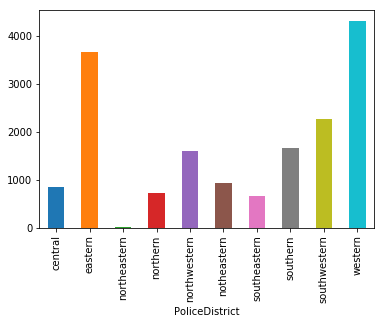

In [72]:
df_vacant.groupby(['PoliceDistrict']).count()['Lot'].plot(kind='bar')

<b>Western and Eastern </b> police district has lot of vacant buildings.

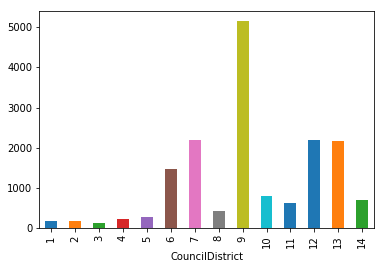

In [74]:
df_vacant.groupby(['CouncilDistrict']).count()['Lot'].plot(kind='bar')

Checking if "Western" maps with council District 9

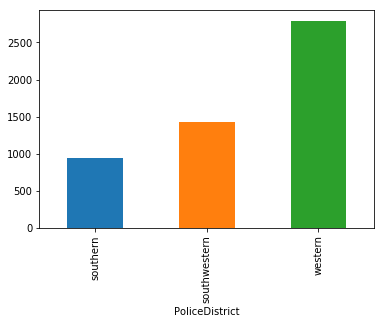

In [75]:
df[df['CouncilDistrict'] == 9].groupby('PoliceDistrict').count()['Lot'].plot(kind = 'bar')

In [76]:
df_crime = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')

In [77]:
df_crime.head(10)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,crimeCaseNumber,Total Incidents
0,07/07/2018,23:53:00,1F,1600 PENTWOOD RD,HOMICIDE,NaN,FIREARM,413.0,NORTHEASTERN,Stonewood-Pentwood-Winsto,-76.58727,39.34782,"(39.34782, -76.58727)",Alley,NaN,1.0
1,07/07/2018,23:50:00,4E,ST & DIVISION ST,COMMON ASSAULT,O,NaN,131.0,CENTRAL,Druid Heights,-76.63936,39.30903,"(39.30903, -76.63936)",STREET,NaN,1.0
2,07/07/2018,23:18:00,4C,2500 PERRING MANOR RD,AGG. ASSAULT,I,OTHER,423.0,NORTHEASTERN,Hamilton Hills,-76.56094,39.37189,"(39.37189, -76.56094)",ROW/TOWNHO,NaN,1.0
3,07/07/2018,22:41:00,9S,3700 S HANOVER ST,SHOOTING,NaN,FIREARM,913.0,SOUTHERN,Brooklyn,-76.61033,39.23703,"(39.23703, -76.61033)",Common Bus,NaN,1.0
4,07/07/2018,22:55:00,4E,LOMBARD ST & LIGHT ST,COMMON ASSAULT,I,NaN,111.0,CENTRAL,Inner Harbor,-76.61362,39.28775,"(39.28775, -76.61362)",CONVENIENC,NaN,1.0
5,07/07/2018,22:18:00,4C,1800 W FRANKLIN ST,AGG. ASSAULT,I,OTHER,722.0,WESTERN,Harlem Park,-76.64652,39.29388,"(39.29388, -76.64652)",ROW/TOWNHO,NaN,1.0
6,07/07/2018,21:40:00,3B,1000 SAINT PAUL ST,ROBBERY - STREET,NaN,NaN,141.0,CENTRAL,Mid-Town Belvedere,-76.61436,39.30165,"(39.30165, -76.61436)",NaN,NaN,1.0
7,07/07/2018,21:16:00,4E,2000 E BALTIMORE ST,COMMON ASSAULT,I,NaN,212.0,SOUTHEASTERN,Butcher's Hill,-76.58809,39.29172,"(39.29172, -76.58809)",ROW/TOWNHO,NaN,1.0
8,07/07/2018,21:08:00,6D,400 E 20TH ST,LARCENY FROM AUTO,I,NaN,341.0,EASTERN,Barclay,-76.61049,39.31244,"(39.31244, -76.61049)",APT/CONDO,NaN,1.0
9,07/07/2018,20:19:00,9S,4900 SINCLAIR LA,SHOOTING,NaN,FIREARM,443.0,NORTHEASTERN,Frankford,-76.55088,39.32101,"(39.32101, -76.55088)",Street,NaN,1.0


In [83]:
df_crime.isnull().sum(axis=0)

CrimeDate              0
CrimeTime              0
CrimeCode              0
Location            3971
Description          248
Inside/Outside     25566
Weapon            261423
Post                 295
District             112
Neighborhood        4213
Longitude           3969
Latitude            3969
Location 1          4755
Premise            21012
dtype: int64

In [80]:
len(df_crime)

335571

In [81]:
df_crime['Total Incidents'].unique()

array([ 1., nan])

In [82]:
df_crime =  df_crime.drop(columns=['crimeCaseNumber', 'Total Incidents'])

In [92]:
df_crime['District'] = df_crime['District'].fillna(0)

In [93]:
df_crime['District'].unique()

array(['NORTHEASTERN', 'CENTRAL', 'SOUTHERN', 'WESTERN', 'SOUTHEASTERN',
       'EASTERN', 'NORTHWESTERN', 'SOUTHWESTERN', 'NORTHERN', 0],
      dtype=object)

Even though Western district has highest number of vacant buildings, it has least crime rate. This goes completely opposite to our intuition. Reason for this has something to do be western district has more number of buildings automatically leading to more number of vacant buildings. To find the truth we must find percentage of vacant buildings in District rather than number of vacant buildings. Since vacant buildings dataset does not contain any information about non vacant buildings, we will use propery tax dataset to these details which contains buildings information. We consider these buildings as non-vacant and calculate percentage of vacant buildings.

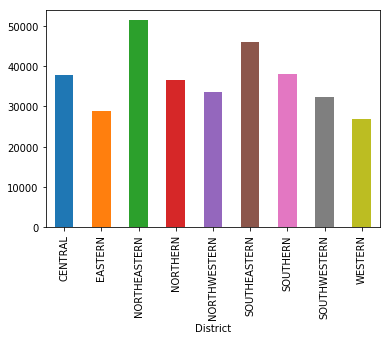

In [101]:
df_crime[df_crime['District'] != 0].groupby(['District']).count()['Location'].plot(kind='bar')

In [131]:
df_property = pd.read_csv("Real_Property_Taxes.csv")

In [132]:
df_property.head(10)

,PropertyID,Block,Lot,Ward,Sect,PropertyAddress,LotSize,CityTax,StateTax,ResCode,AmountDue,AsOfDate,Neighborhood,PoliceDistrict,CouncilDistrict,Location
0,0001002,0001,002,15,370,2043 W NORTH AVE,14X83-10,1112.76,55.44,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941619, -76.65109034)"
1,5918064,5918,064,26,380,3429 SHANNON DR,18X91-9,2801.01,139.55,PRINCIPAL RESIDENCE,1356.50,09/29/2018,Belair-Edison,Notheastern,13.0,"(39.3229146, -76.56235554)"
2,0001004,0001,004,15,370,2039 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30941951, -76.65099026)"
3,0001005,0001,005,15,370,2037 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942111, -76.65094166)"
4,0001006,0001,006,15,370,2035 W NORTH AVE,14X83-10,247.28,12.32,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942277, -76.65089166)"
5,4179P033,4179P,033,26,340,3811 LYNDALE AVE,14X100,2032.19,101.25,NOT A PRINCIPAL RESIDENCE,2123.28,07/01/2018,Belair-Edison,Notheastern,13.0,"(39.31680208, -76.56505749)"
6,0001009,0001,009,15,370,2029 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942756, -76.65074605)"
7,0001010,0001,010,15,370,2027 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30942925, -76.65069531)"
8,0001011,0001,011,15,370,2025 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943089, -76.65064581)"
9,0001012,0001,012,15,370,2023 W NORTH AVE,14X83-10,472.08,23.52,NOT A PRINCIPAL RESIDENCE,NaN,06/04/2018,Easterwood,Western,7.0,"(39.30943253, -76.65059631)"


In [133]:
df_property.isnull().sum(axis=0)

PropertyID             0
Block                  0
Lot                    0
Ward                   0
Sect                   0
PropertyAddress        5
LotSize                0
CityTax            18976
StateTax           18778
ResCode                0
AmountDue          98686
AsOfDate               0
Neighborhood       16122
PoliceDistrict     16122
CouncilDistrict    16094
Location           16082
dtype: int64

In [134]:
df_property.dtypes

PropertyID          object
Block               object
Lot                 object
Ward                 int64
Sect                 int64
PropertyAddress     object
LotSize             object
CityTax            float64
StateTax           float64
ResCode             object
AmountDue          float64
AsOfDate            object
Neighborhood        object
PoliceDistrict      object
CouncilDistrict    float64
Location            object
dtype: object

In [135]:
df_property.describe()

,Ward,Sect,CityTax,StateTax,AmountDue,CouncilDistrict
count,238509.000000,238509.000000,2.195330e+05,219731.000000,1.398230e+05,222415.000000
mean,18.661505,145.082534,4.056272e+03,205.074626,3.336122e+03,7.594290
std,8.197253,133.920428,3.532905e+04,1817.644405,2.882668e+04,4.043136
min,1.000000,0.000000,2.250000e+00,0.110000,1.000000e-02,1.000000
25%,12.000000,50.000000,8.092800e+02,40.320000,6.894200e+02,4.000000
50%,20.000000,110.000000,2.367140e+03,118.050000,1.539640e+03,8.000000
75%,27.000000,200.000000,3.635020e+03,181.100000,2.846385e+03,11.000000
max,50.000000,690.000000,6.276443e+06,312705.340000,3.983104e+06,14.000000


Since only thing that is important for us is PropertyAddress, check for null values in that column and try to join with address in vacant buildings dataset.

In [136]:
df_property[df_property['PropertyAddress'].isnull()]
df_property['PoliceDistrict'] = df_property['PoliceDistrict'].fillna(0)

In [137]:
df_property = df_property[df_property['PropertyAddress'].notnull()]

In [138]:
df_join = df_property.join(df_vacant, lsuffix='property', rsuffix='vacant', how='inner')

In [139]:
len(df_property)

238504

In [140]:
len(df_vacant)

16691

In [141]:
len(df_join)

16691

In [144]:
list(df_property.groupby(['PoliceDistrict']).count()['Ward'])

[16121, 8938, 19539, 30503, 23621, 42261, 27163, 25251, 25706, 19401]

In [145]:
df_property.groupby(['PoliceDistrict']).count()['Ward']

PoliceDistrict
0               16121
Central          8938
Eastern         19539
Northern        30503
Northwestern    23621
Notheastern     42261
Southeastern    27163
Southern        25251
Southwestern    25706
Western         19401
Name: Ward, dtype: int64

In [146]:
df_vacant.groupby(['PoliceDistrict']).count()['Lot']

PoliceDistrict
central          848
eastern         3659
northeastern       9
northern         718
northwestern    1613
notheastern      945
southeastern     656
southern        1665
southwestern    2263
western         4315
Name: Lot, dtype: int64

Again results are surprising. Number of buildings in Western district is low side(least but one). This means not only there few buildings in western district of baltimore, but most of them are vacant. 

In [151]:
policeDistrict_property = dict(df_property.groupby(['PoliceDistrict']).count()['Ward'])

In [153]:
policeDistrict_vacant = dict(df_vacant.groupby(['PoliceDistrict']).count()['Lot'])

In [154]:
policeDistrict_vacant['northeastern'] = 954

This loop is used to calculate relative vacancies district wise.

In [160]:
relative_vacancy = {}
for key in policeDistrict_property:
    if key != 0:
        relative_vacancy[key] = (policeDistrict_vacant[key.lower()] / policeDistrict_property[key]) * 100

In [161]:
print(relative_vacancy)

{'Central': 9.487581114343254, 'Eastern': 18.72664926557142, 'Northern': 2.353866832770547, 'Northwestern': 6.828669404343593, 'Notheastern': 2.2361042095549086, 'Southeastern': 2.4150498840334276, 'Southern': 6.593798265415231, 'Southwestern': 8.803392204154672, 'Western': 22.24112159167053}


Western leads by large margin followed by Eastern just like in first bar graph. At this point big picture is starting to get clear. Western district least number of crimes because there are not many non vacant buildings and more vacant buildings which means less population and less crimes.

TO DO:</br>
Need to reason vacant buildings using 311 and 911 datasets.

Then try to find which factor is affecting more using decision trees